In [1]:
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



In [26]:
fb_pelatihan = pd.read_excel('./dataset/Feedback_Lat_2020.xlsx', sheet_name='UBPP Penyelenggaraan', skiprows=range(0), skipfooter=2)

In [27]:
fb_pelatihan.head()

,Nama Pelatihan,Objid Pelatihan,Category,Tipe,Lokasi Pelatihan,Provider,Academy Event,Location,Provider Category,Event Type,...,UBPP Akom,UBPP Sarana,UBPP Laborat,UBPP Penyelenggaraan,UBPP Kafetaria,UBPP Materi,Net Promotor Score,Customer Satisfaction,First Response & Average Handling,Customer Effort Score
0,Social Media Ads & Analytic,80114181,LAT,NaN,Bandung,Learning Area 2 Jakarta,CONSUMER,Online (Lokasi Masing-Masing),Internal,Internal,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CISM,80114269,LAT,Virtual Classroom,Bandung,Learning Area 3 / LO,NITS,Online (Lokasi Masing-Masing),NaN,Public,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Programmer Development Course Amoeba,80114271,LAT,E-learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Business Analytics Amoeba,80114280,LAT,Video Learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Online UX Design Course Amoeba,80114281,LAT,E-learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
fb_pelatihan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Nama Pelatihan                     1579 non-null   object 
 1   Objid Pelatihan                    1579 non-null   int64  
 2   Category                           1579 non-null   object 
 3   Tipe                               895 non-null    object 
 4   Lokasi Pelatihan                   1447 non-null   object 
 5   Provider                           1480 non-null   object 
 6   Academy Event                      1458 non-null   object 
 7   Location                           1513 non-null   object 
 8   Provider Category                  1239 non-null   object 
 9   Event Type                         1525 non-null   object 
 10  Status                             1518 non-null   object 
 11  Tgl Mulai                          1579 non-null   objec

In [29]:
fb_pelatihan['Tgl']=fb_pelatihan['Tgl Mulai'].astype('datetime64[ns]')
fb_pelatihan['Bulan']=fb_pelatihan['Tgl'].dt.month

In [30]:
fb_pelatihan.head()

,Nama Pelatihan,Objid Pelatihan,Category,Tipe,Lokasi Pelatihan,Provider,Academy Event,Location,Provider Category,Event Type,...,UBPP Laborat,UBPP Penyelenggaraan,UBPP Kafetaria,UBPP Materi,Net Promotor Score,Customer Satisfaction,First Response & Average Handling,Customer Effort Score,Tgl,Bulan
0,Social Media Ads & Analytic,80114181,LAT,NaN,Bandung,Learning Area 2 Jakarta,CONSUMER,Online (Lokasi Masing-Masing),Internal,Internal,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-12-16,12
1,CISM,80114269,LAT,Virtual Classroom,Bandung,Learning Area 3 / LO,NITS,Online (Lokasi Masing-Masing),NaN,Public,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-12-16,12
2,Programmer Development Course Amoeba,80114271,LAT,E-learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-12-16,12
3,Business Analytics Amoeba,80114280,LAT,Video Learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-12-16,12
4,Online UX Design Course Amoeba,80114281,LAT,E-learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-12-16,12


In [32]:
fb_peserta = fb_pelatihan[['Academy Event', 'Bulan', 'JML Peserta Hadir']]
fb_peserta.head()

,Academy Event,Bulan,JML Peserta Hadir
0,CONSUMER,12,0
1,NITS,12,0
2,DSP,12,0
3,DSP,12,0
4,DSP,12,0


In [34]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

print ('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.2.2


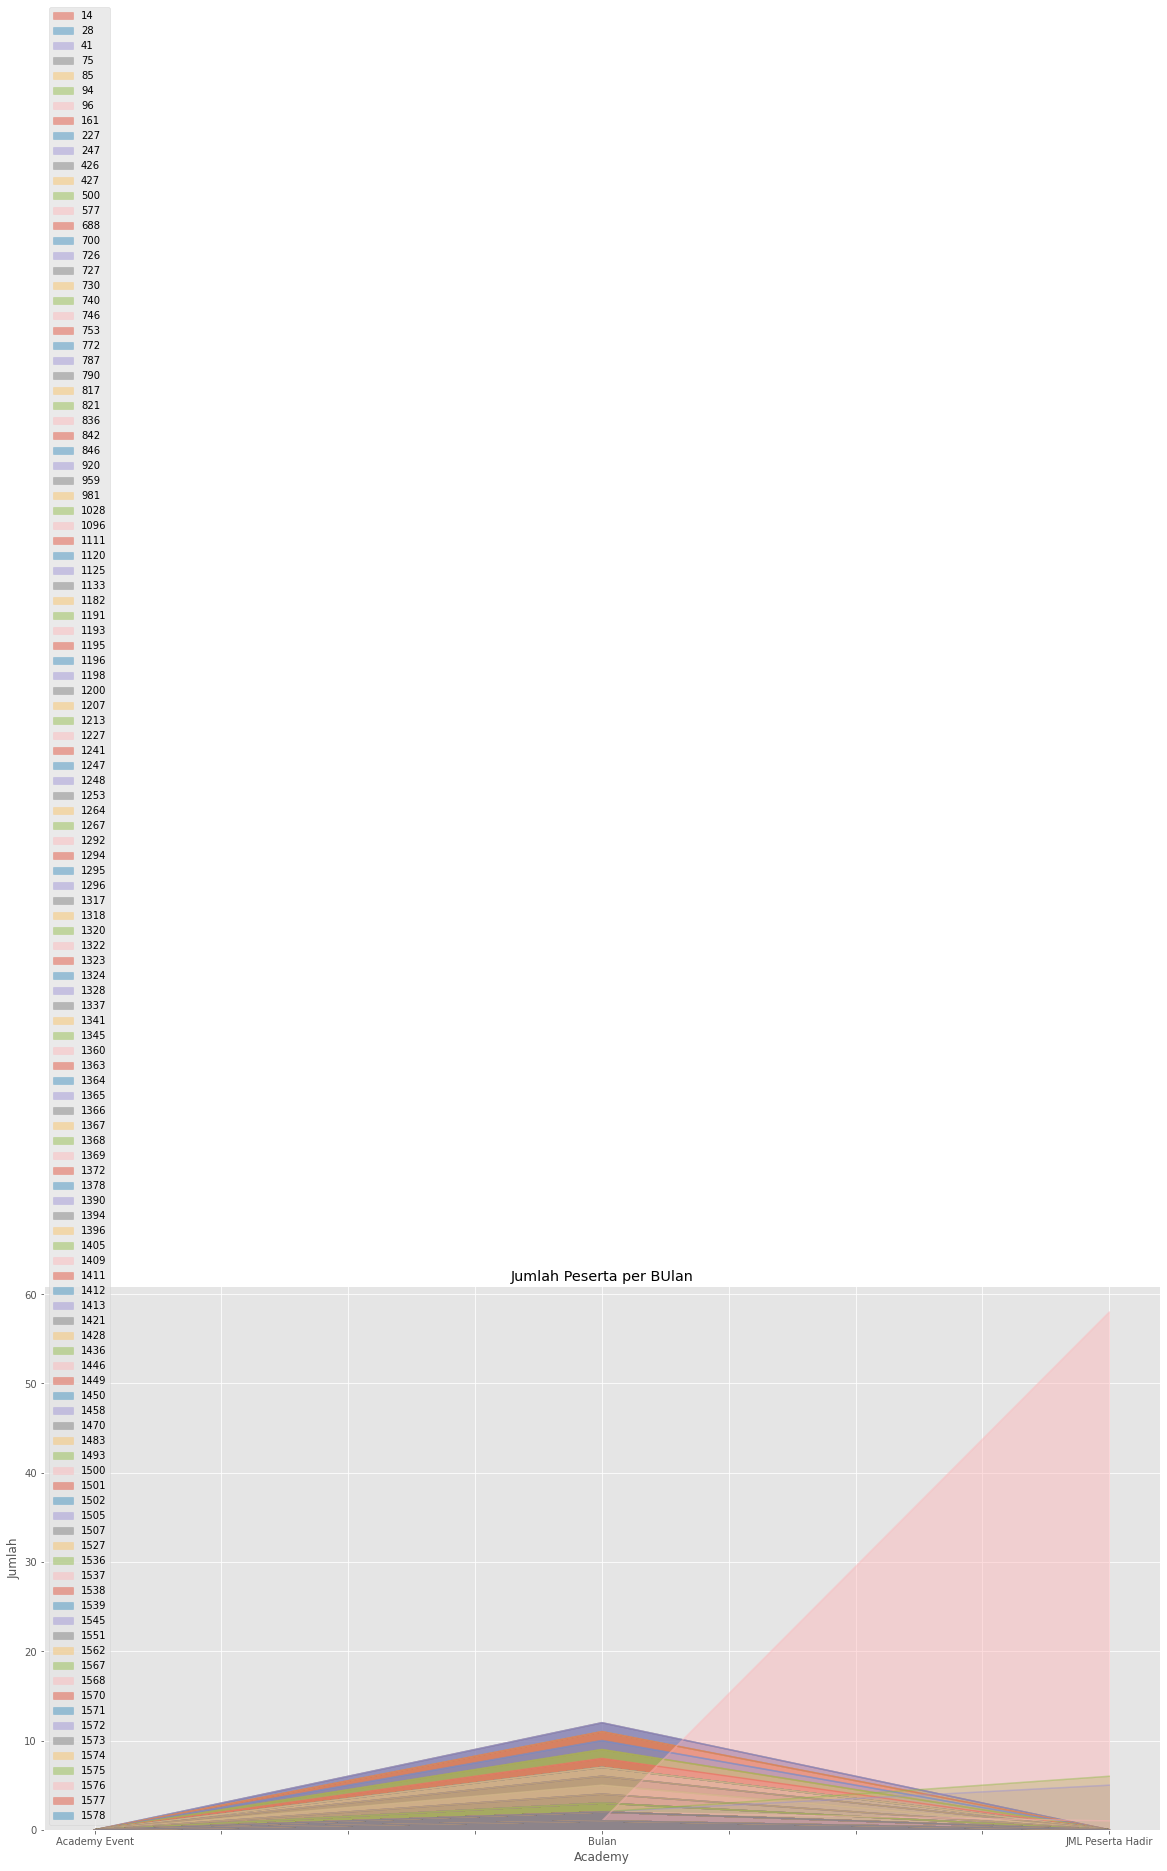

In [39]:
mpl.style.use(['ggplot'])
fb_peserta=fb_peserta.transpose()
fb_peserta.plot(kind='area',
              alpha = 0.45,
              stacked = False,
              figsize = (20,10),)

plt.title('Jumlah Peserta per BUlan')
plt.ylabel('Jumlah')
plt.xlabel('Academy')

plt.show()